In [2]:
!pip install tensorflow_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.3 MB/s eta 0:00:004.3 MB/s eta 0:00:01
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 4.2 MB/s eta 0:00:004.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.2/293.2 kB 6.6 MB/s eta 0:00:006.9 MB/s eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21489 sha256=77918b1adba001f9b632d6c64cedf74dd79037b38412d188edcad4d5df135716
  Stored in directo

In [4]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np

if not tf.__version__.startswith('2'):
    raise ValueError('This code requires TensorFlow V2.x')


In [5]:
(train_data, test_data), info = tfds.load('imdb_reviews',split=[tfds.Split.TRAIN, tfds.Split.TEST],as_supervised=True,with_info=True)

2025-04-10 00:28:44.374674: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 100%|██████████| 1/1 [00:34<00:00, 34.07s/ url]


Dataset imdb_reviews downloaded and prepared to /home/psytama/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [6]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path=PosixGPath('/tmp/tmp08yuccdctfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInf

In [8]:
print(len(train_data))
print(len(test_data))

25000
25000


In [9]:
for review, label in train_data.take(2):  
    print("Review:", review.numpy().decode('utf-8'))  
    print("Sentiment:", "Positive" if label.numpy() == 1 else "Negative")

Review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Sentiment: Negative
Review: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was ru

2025-04-10 00:32:09.475701: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [10]:
# Tokenize and pad the reviews
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
train_sentences, train_labels = zip(*[(sent.numpy().decode('utf8'), label.numpy()) for sent, label in train_data])
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')

test_sentences, test_labels = zip(*[(sent.numpy().decode('utf8'), label.numpy()) for sent, label in test_data])
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [12]:
model = keras.models.Sequential([
            keras.layers.Embedding(10000, 64),
            keras.layers.SimpleRNN(64),
            keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_padded, train_labels, epochs=1, validation_data=(test_padded, test_labels))

782/782 [==============================] - 19s 22ms/step - loss: 0.6941 - accuracy: 0.5200 - val_loss: 0.6867 - val_accuracy: 0.5458


In [13]:
print("Training Loss per epoch:", history.history['loss'])
print("Training Accuracy per epoch:", history.history['accuracy'])
print("Validation Loss per epoch:", history.history['val_loss'])
print("Validation Accuracy per epoch:", history.history['val_accuracy'])

Training Loss per epoch: [0.6941391229629517]
Training Accuracy per epoch: [0.5199999809265137]
Validation Loss per epoch: [0.6867226362228394]
Validation Accuracy per epoch: [0.545799970626831]


In [14]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

782/782 [==============================] - 3s 4ms/step - loss: 0.6867 - accuracy: 0.5458
Test Accuracy: 0.5458
Test Loss: 0.6867


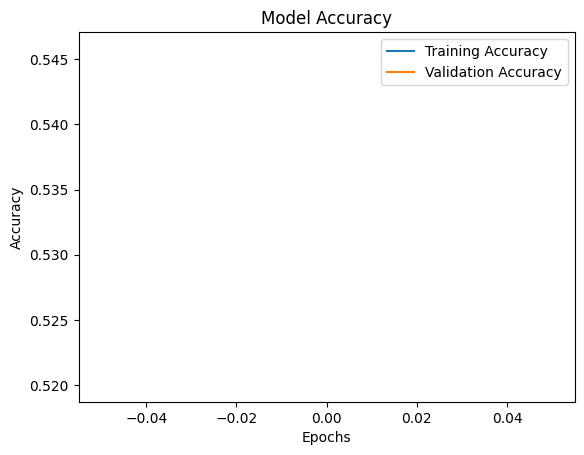

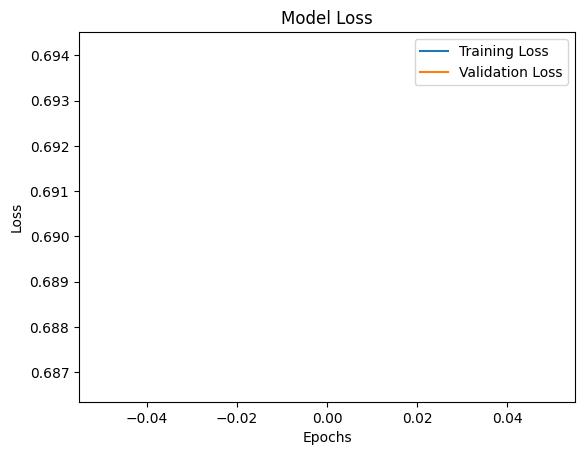

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [17]:
sample_texts = ["This is a great product!", "I had a terrible experience."]
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = keras.preprocessing.sequence.pad_sequences(sample_sequences, maxlen=100, padding='post', truncating='post')

predictions = model.predict(sample_padded)
predicted_labels = ['Positive' if p > 0.5 else 'Negative' for p in predictions]

for text, label in zip(sample_texts, predicted_labels):
    print(f"Review: {text} | Sentiment: {label}")

1/1 [==============================] - 0s 144ms/step
Review: This is a great product! | Sentiment: Positive
Review: I had a terrible experience. | Sentiment: Positive


In [18]:
model = keras.models.Sequential([
            keras.layers.Embedding(10000, 32), # Reduced embedding dimension
            keras.layers.Dropout(0.5), # Added dropout
            keras.layers.SimpleRNN(32, kernel_regularizer=keras.regularizers.l2(0.001)), # L2 regularization
            keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Adding early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_padded, train_labels, epochs=1, validation_data=(test_padded, test_labels), callbacks=[early_stop])


782/782 [==============================] - 15s 18ms/step - loss: 0.7124 - accuracy: 0.5049 - val_loss: 0.6987 - val_accuracy: 0.5323


In [19]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

782/782 [==============================] - 3s 4ms/step - loss: 0.6987 - accuracy: 0.5323
Test Accuracy: 0.5323
Test Loss: 0.6987


In [20]:
sample_texts = ["This is a great product!", "I had a terrible experience."]
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = keras.preprocessing.sequence.pad_sequences(sample_sequences, maxlen=100, padding='post', truncating='post')

predictions = model.predict(sample_padded)
predicted_labels = ['Positive' if p > 0.5 else 'Negative' for p in predictions]

for text, label in zip(sample_texts, predicted_labels):
    print(f"Review: {text} | Sentiment: {label}")

1/1 [==============================] - 0s 104ms/step
Review: This is a great product! | Sentiment: Positive
Review: I had a terrible experience. | Sentiment: Positive


In [21]:
from keras.layers import Bidirectional, LSTM

model = keras.models.Sequential([
            keras.layers.Embedding(10000, 32),
            Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
            keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_padded, train_labels, epochs=1, validation_data=(test_padded, test_labels), callbacks=[early_stop])


782/782 [==============================] - 83s 100ms/step - loss: 0.5156 - accuracy: 0.7458 - val_loss: 0.4286 - val_accuracy: 0.8121


In [22]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

782/782 [==============================] - 15s 19ms/step - loss: 0.4286 - accuracy: 0.8121
Test Accuracy: 0.8121
Test Loss: 0.4286


In [17]:
sample_texts = ["This is a great product!", "I had a terrible experience."]
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = keras.preprocessing.sequence.pad_sequences(sample_sequences, maxlen=100, padding='post', truncating='post')

predictions = model.predict(sample_padded)
predicted_labels = ['Positive' if p > 0.5 else 'Negative' for p in predictions]

for text, label in zip(sample_texts, predicted_labels):
    print(f"Review: {text} | Sentiment: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Review: This is a great product! | Sentiment: Positive
Review: I had a terrible experience. | Sentiment: Negative


In [18]:
from keras.layers import Conv1D, MaxPooling1D

model = keras.models.Sequential([
            keras.layers.Embedding(10000, 32),
            Conv1D(32, 7, activation='relu'),
            MaxPooling1D(5),
            Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
            Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
            keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint = keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

history = model.fit(train_padded, train_labels, epochs=1, validation_data=(test_padded, test_labels), callbacks=[early_stop, checkpoint])


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.5646 - loss: 0.7552 - val_accuracy: 0.8028 - val_loss: 0.4330


In [23]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

782/782 [==============================] - 11s 15ms/step - loss: 0.4286 - accuracy: 0.8121
Test Accuracy: 0.8121
Test Loss: 0.4286


In [24]:
sample_texts = ["This is a great product!", "I had a terrible experience."]
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = keras.preprocessing.sequence.pad_sequences(sample_sequences, maxlen=100, padding='post', truncating='post')

predictions = model.predict(sample_padded)
predicted_labels = ['Positive' if p > 0.5 else 'Negative' for p in predictions]

for text, label in zip(sample_texts, predicted_labels):
    print(f"Review: {text} | Sentiment: {label}")

1/1 [==============================] - 1s 729ms/step
Review: This is a great product! | Sentiment: Positive
Review: I had a terrible experience. | Sentiment: Negative
